<img src="https://geodecode.com.br/wp-content/uploads/2021/12/brasildatacube.png" align="left" width="74"/>
<img src="https://brazil-data-cube.github.io/_images/logo-odc-bdc.png" align="right" width="74" />

<h1 style="color:#336699; text-align: center" >Annual Metting Use Case</h1>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    <sup>
        <a href="https://orcid.org/0000-0002-9916-1167">
            <i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i>
        </a>
    </sup>
    <br/>
    Brazil Data Cube (BDC), National Institute for Space Research (INPE)
    <br/>
    <br/>
    <br/>
    <div style="width: 98%;">
        <div style="text-align: justify; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            <b>Explantion here....:</b>
            <div>
                Write write write write writewrite writewrite write. <a href="http://www.brazildatacube.org/" target="_blank">Site site site site site</a>, <i> Outras infos</i> .......
            </div>
        </div>
    </div>
</div>

In [8]:
library(dplyr)
library(ggplot2)

# 1. Read CSVs
<hr style="border:1px solid #0077b9;">

### 1.1 Read temperature data 

In [9]:
FILENAME <- "data_36_months_temperature.csv"

temperature_df <- read.csv(FILENAME)

head(temperature_df)

,cd_mun,nm_mun,UF,temperature,year_month
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1500107,Abaetetuba,PA,32.29361,2021-12
2,1500800,Ananindeua,PA,32.45644,2021-12
3,1501105,Bagre,PA,32.98824,2021-12
4,1501204,Baião,PA,32.64342,2021-12
5,1501303,Barcarena,PA,32.06986,2021-12
6,1501402,Belém,PA,32.09974,2021-12


### 1.2 Read dengue data

In [14]:
FILENAME <- "data_36_months_dengue.csv"

dengue_df <- read.csv(FILENAME)

head(dengue_df)

,cd_mun,cases,year_month
,<int>,<dbl>,<chr>
1,150010,0.00,2021-12
2,150080,0.19,2021-12
3,150110,0.00,2021-12
4,150120,0.00,2021-12
5,150130,0.00,2021-12
6,150140,0.20,2021-12


### 1.3 Read NDVI data

In [15]:
# FILENAME <- "data_3_months_dengue.csv"
# dengue_df <- read.csv(FILENAME)

# 2. Scatter Plots
<hr style="border:1px solid #0077b9;">

### 2.1 Temperature vs. Dengue

##### 2.1.1 Merge dataframes

In [16]:
# Remove last char of municipality code in temperature data
temperature_df2 <- temperature_df %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1))

# Merge dataframes
merge_dengue_temperature <- merge(dengue_df, temperature_df2, by = c("cd_mun", "year_month")) %>%
  select(cd_mun, year_month, nm_mun, UF, temperature, cases)

dim(merge_dengue_temperature)
head(merge_dengue_temperature)

[1] 756   6

,cd_mun,year_month,nm_mun,UF,temperature,cases
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,150010,2019-01,Abaetetuba,PA,31.60663,0.00
2,150010,2019-02,Abaetetuba,PA,30.89762,0.63
3,150010,2019-03,Abaetetuba,PA,30.43442,0.00
4,150010,2019-04,Abaetetuba,PA,30.42358,0.63
5,150010,2019-05,Abaetetuba,PA,31.05354,0.00
6,150010,2019-06,Abaetetuba,PA,31.17913,0.63


##### 2.1.2 Scatter Plot

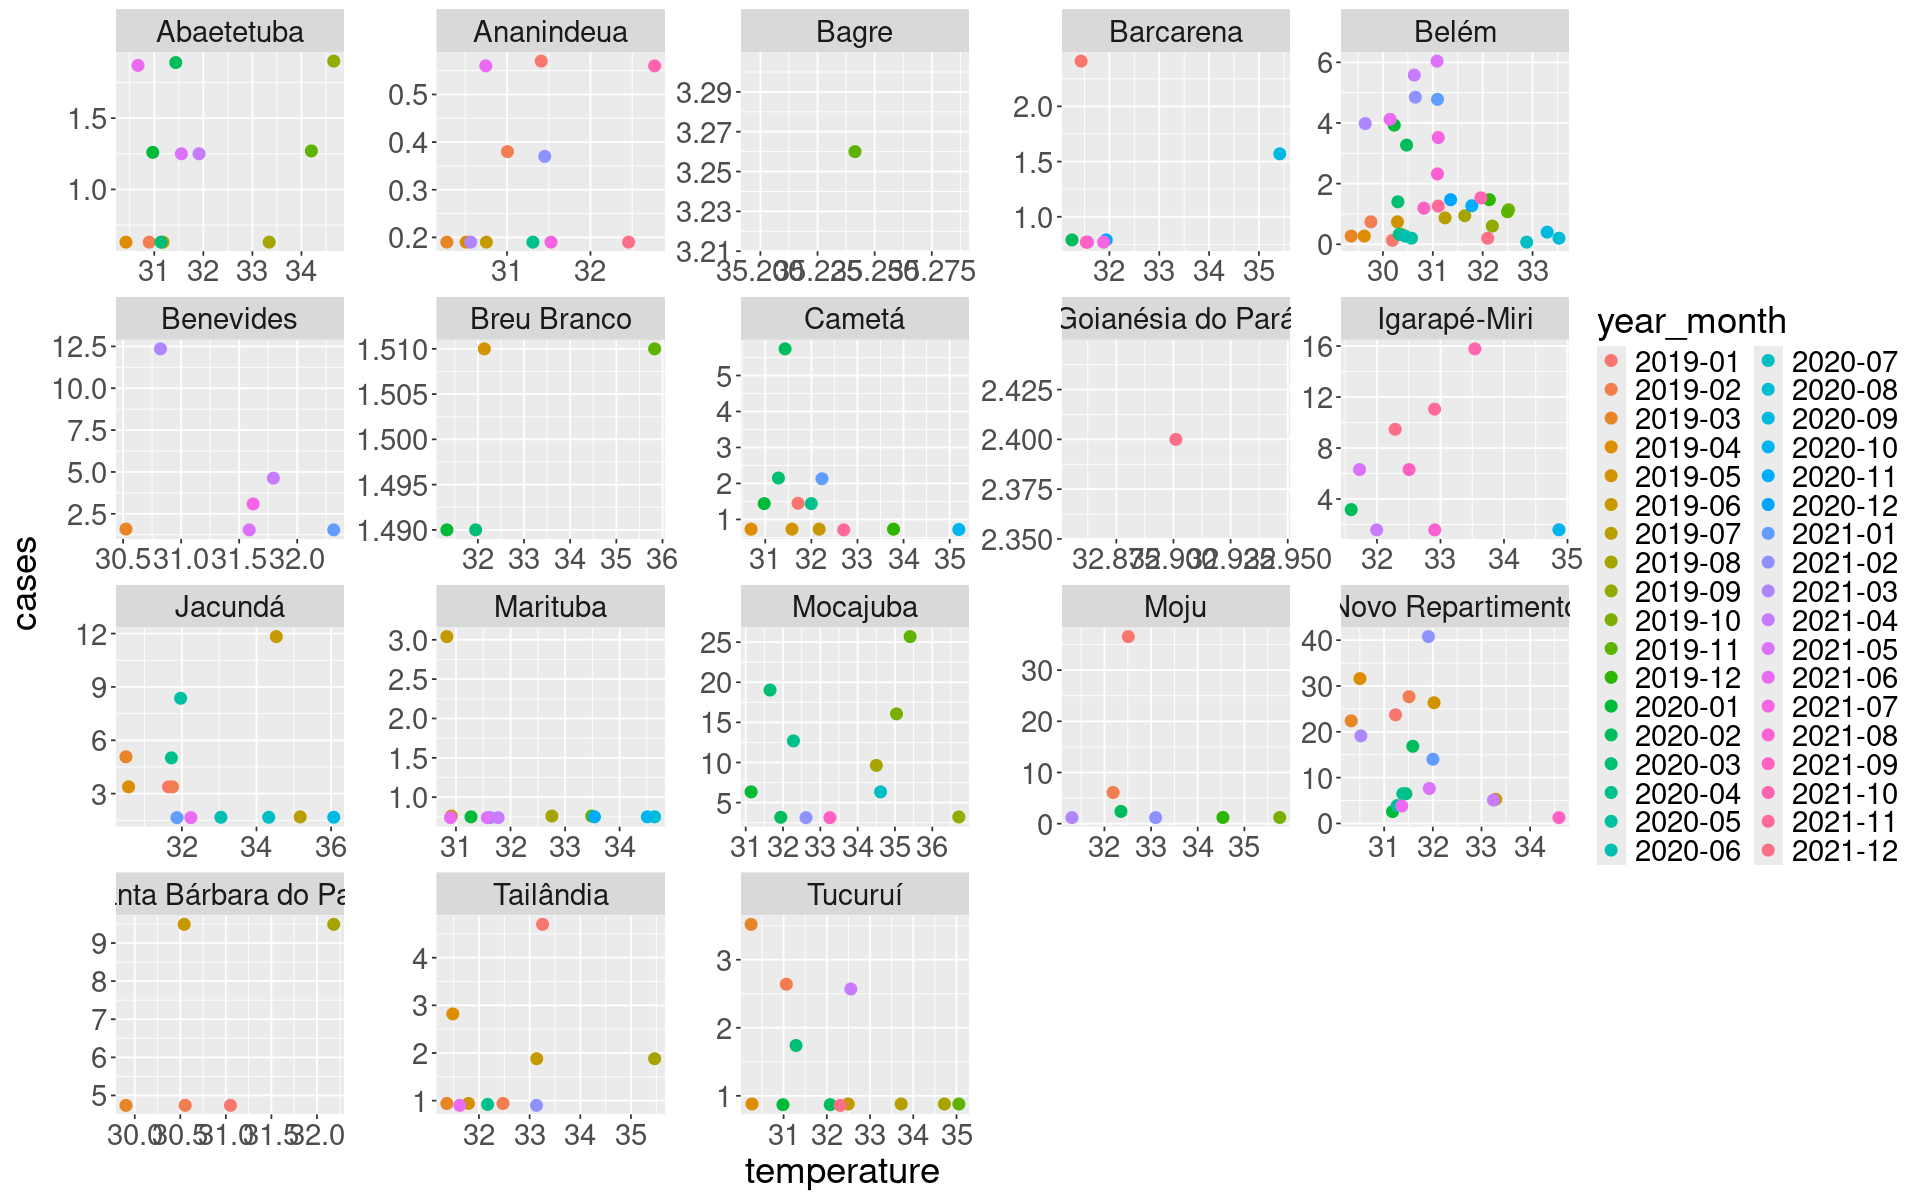

In [19]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(merge_dengue_temperature) +
  geom_point(aes(x = temperature, y = cases, colour = year_month), size = 3) +
  facet_wrap(nm_mun ~ .) +
  # scale_colour_viridis_d() +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  )

### 2.2 NDVI vs. Dengue

##### 2.2.1 Merge dataframes

In [ ]:
# merge_dengue_temperature <- merge(dengue_df, temperature_df2, by = c("cd_mun", "year_month")) %>%
#   select(cd_mun, year_month, nm_mun, UF, temperature, cases)

# dim(merge_dengue_temperature)
# head(merge_dengue_temperature)

##### 2.2.2 Scatter Plot

In [ ]:
# options(repr.plot.width = 16, repr.plot.height = 10)

# ggplot(merge_dengue_temperature) +
#   geom_point(aes(x = temperature, y = cases, colour = year_month), size = 3) +
#   facet_wrap(nm_mun ~ .) +
#   # scale_colour_viridis_d() +
#   theme(
#     legend.position = "right",
#     text = element_text(size = 22)
#   )